# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [19]:
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"

### Step 3. Assign it to a variable apple

In [20]:
apple=pd.read_csv(url)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [21]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [22]:
apple['Date']=pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [23]:
apple.set_index(['Date'],inplace=True)

### Step 7.  Is there any duplicate dates?

In [30]:
apple[apple.duplicated()]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


In [31]:
x=apple[apple.duplicated()]
if len(x)>0:
  print("Yes there are duplicates in data column")
else:
    print("No there are no duplicates in date column")

No there are no duplicates in date column


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [34]:
apple.sort_values(by=['Date'],inplace=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [ ]:
apple.reset_index(inplace=True)

In [63]:
apple.Date.dt.day

0       12
1       15
2       16
3       17
4       18
        ..
8460     1
8461     2
8462     3
8463     7
8464     8
Name: Date, Length: 8465, dtype: int64

In [64]:
apple['day']=apple.Date.dt.day
apple.groupby(apple.Date.dt.month)['day'].max()

Date
1     31
2     29
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
Name: day, dtype: int64

In [52]:
apple["month"] = pd.DatetimeIndex(apple.Date).month
apple["Date_wo"] = pd.DatetimeIndex(apple.Date).day
apple.groupby(by="month")[["Date_wo"]].max().reset_index()

,month,Date_wo
0,1,31
1,2,29
2,3,31
3,4,30
4,5,31
5,6,30
6,7,31
7,8,31
8,9,30
9,10,31


### Step 10.  What is the difference in days between the first day and the oldest

In [41]:
apple.Date.max()-apple.Date.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [45]:
len(apple.Date.dt.month)

8465

In [47]:
apple.Date.dt.month.count()

8465

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

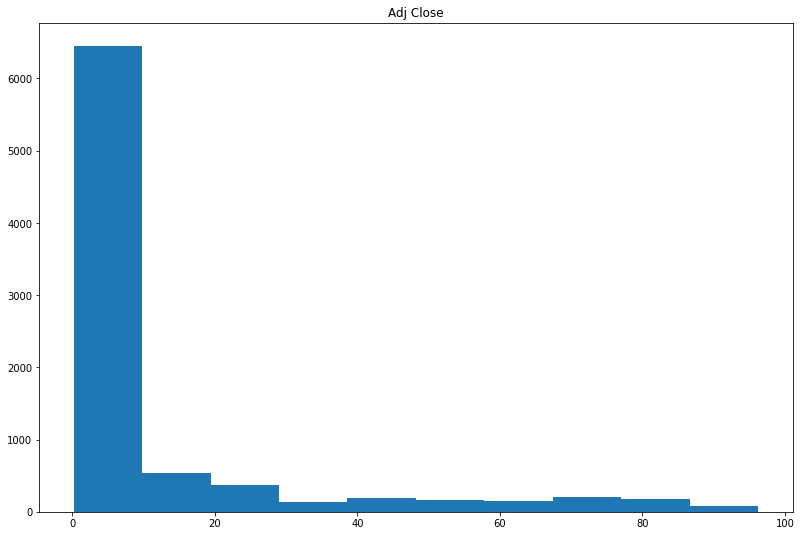

In [50]:
plt.figure(figsize=(13.5,9))
plt.hist(apple['Adj Close'])
plt.title('Adj Close')
plt.show()

### BONUS: Create your own question and answer it.